In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = load_breast_cancer()

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [10]:
X = data.data

In [11]:
X.shape

(569, 30)

In [12]:
y = data.target

In [17]:
print("number benign :",sum(y==0), "number malignant :",sum(y==1))

number benign : 212 number malignant : 357


In [18]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [35]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [21]:
pc = PCA(n_components=2)
pc.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
new = pc.transform(X)

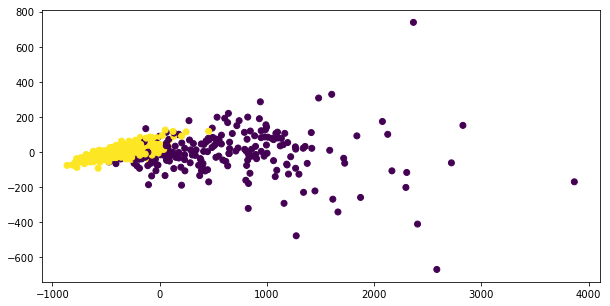

In [34]:
plt.figure(figsize=(10,5))
plt.scatter(x=new[:,0],y=new[:,1],marker="o",c=y)

In [36]:
tse = TSNE(n_components=2)

In [38]:
new_ts =tse.fit_transform(X)


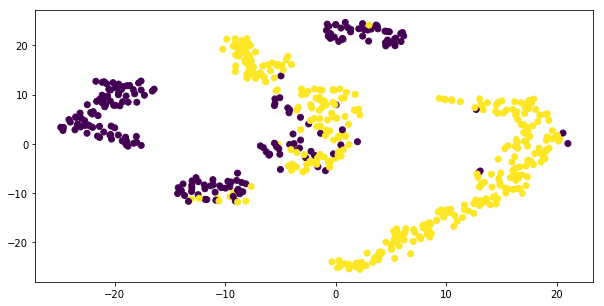

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(x=new_ts[:,0],y=new_ts[:,1],marker="o",c=y)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [44]:
n_neighbors = np.arange(1,12,2)

In [50]:
train_acc =[]
test_acc =[]
for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pre = knn.predict(X_test)
    accuracy_test = accuracy_score(y_test,y_pre)
    accuracy_train = accuracy_score(y_train,knn.predict(X_train))
    train_acc.append(accuracy_train)
    test_acc.append(accuracy_test)

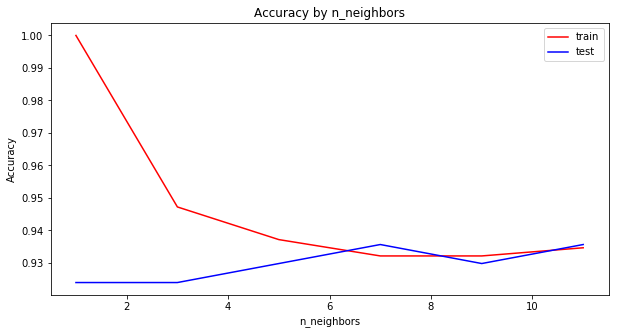

In [55]:
plt.figure(figsize=(10,5))
plt.plot(n_neighbors,train_acc,c="red",label="train")
plt.plot(n_neighbors,test_acc,c="blue",label="test")
plt.title("Accuracy by n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
# knn - hai tham số quan trọng là k (số neighbors) và phương thức đo lường distance
# làm việc tốt khi dữ liệu small và ít feature